In [2]:
# ! pip install tensorflow


In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,AveragePooling2D,MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
np.set_printoptions(precision=4)

## Import tha Fashion MNIST dataset

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
(train_images, valid_images) = train_images[:50000], train_images[50000:]
(train_labels, valid_labels) = train_labels[:50000], train_labels[50000:]

In [5]:
print(f"trianing set: {train_images.shape}") # 60,000 images in the training set, each image represented as 28x28 px
print(f"validation set: {valid_images.shape}") # 10,000 images in the validation set, each image represented as 28x28 px
print(f"test set: {test_images.shape}") # 10,000 images in the test set, each image represented as 28x28 px

trianing set: (50000, 28, 28)
validation set: (10000, 28, 28)
test set: (10000, 28, 28)


## Preprocess the data
The pixel values fall in the range of 0 to 255, so i scale values to range 0 to 1 before feeding them to neural networ model. To do so, I divided the values by 255.

I dispalyed the first 25 images from the training set and the label name below in order to verify that the data is in the correct format to build and train the network.

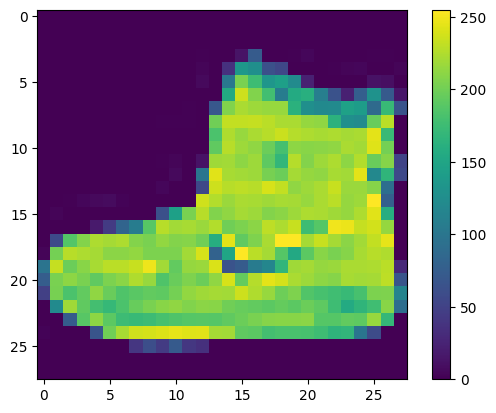

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:

train_images, test_images = train_images / 255.0, test_images / 255.0


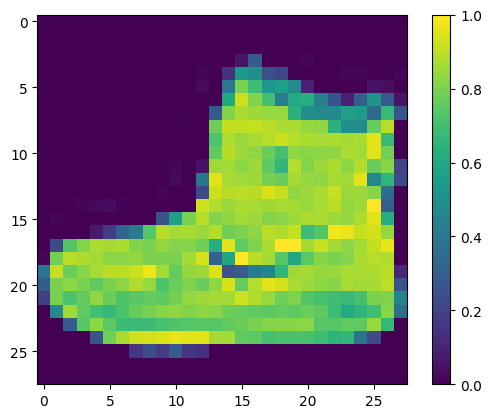

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

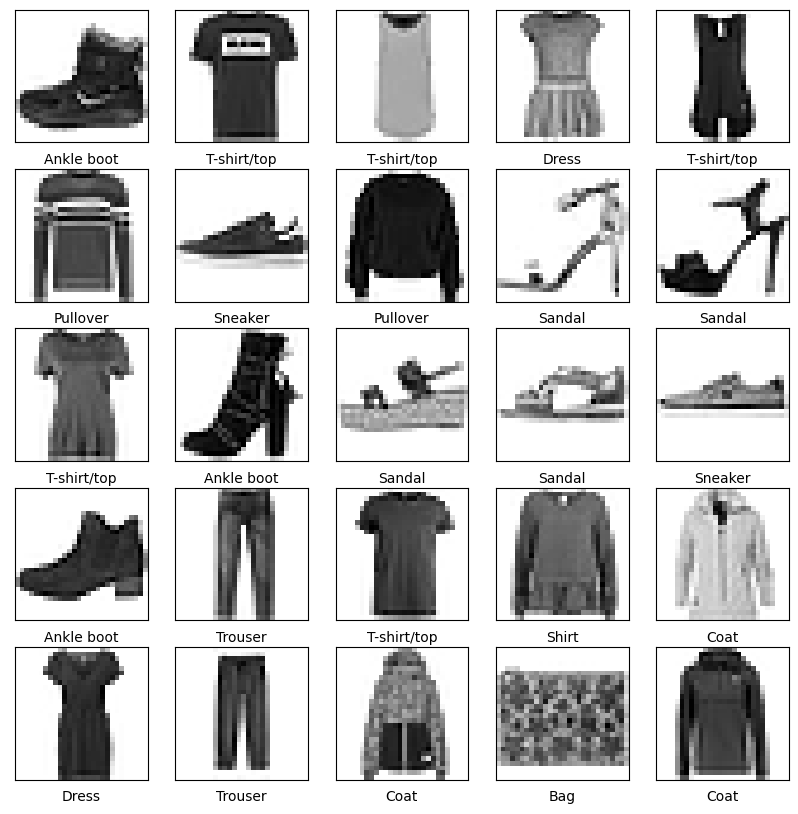

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building the model
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them.

In [25]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 32)         

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
chekcpoint = ModelCheckpoint('best_model.hdf5',verbose=1,save_best_only=True, monitor = 'val_accuracy')

hist = model.fit(train_images,train_labels, batch_size=128,
          callbacks=[chekcpoint],
          steps_per_epoch=train_images.shape[0] // 128, 
          epochs=50,
          verbose=2,
          validation_data=(valid_images, valid_labels)
         )

Epoch 1/50


/home/miriam/.local/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



Epoch 1: val_accuracy improved from -inf to 0.80970, saving model to best_model.hdf5
390/390 - 55s - loss: 1.4375 - accuracy: 0.6590 - val_loss: 0.5282 - val_accuracy: 0.8097 - 55s/epoch - 141ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.80970 to 0.84220, saving model to best_model.hdf5
390/390 - 50s - loss: 0.5979 - accuracy: 0.7769 - val_loss: 0.4343 - val_accuracy: 0.8422 - 50s/epoch - 129ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.84220 to 0.85960, saving model to best_model.hdf5
390/390 - 57s - loss: 0.5187 - accuracy: 0.8056 - val_loss: 0.3821 - val_accuracy: 0.8596 - 57s/epoch - 146ms/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.85960 to 0.86840, saving model to best_model.hdf5
390/390 - 54s - loss: 0.4718 - accuracy: 0.8249 - val_loss: 0.3511 - val_accuracy: 0.8684 - 54s/epoch - 137ms/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.86840 to 0.87640, saving model to best_model.hdf5
390/390 - 53s - loss: 0.4358 - accuracy: 0.8390 - val_


    Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
    Optimizer —This is how the model is updated based on the data it sees and its loss function.
    Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


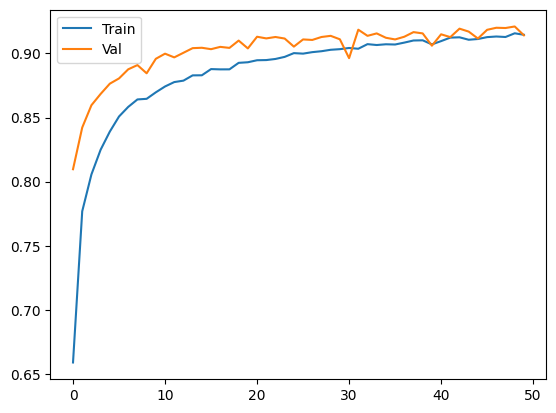

In [35]:
plt.plot(hist.history['accuracy'],label='Train')
plt.plot(hist.history['val_accuracy'],label='Val')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Loss evolution')

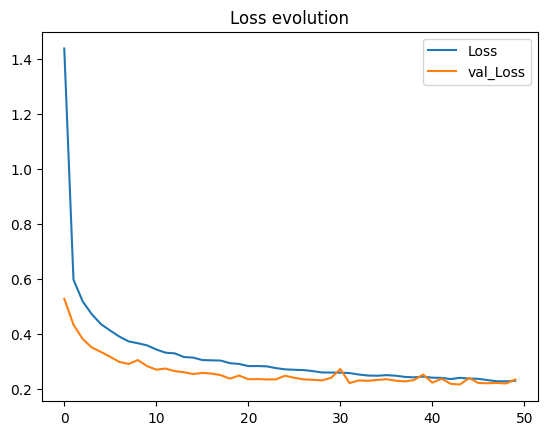

In [33]:
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

In [29]:
train_loss, train_acc = model.evaluate(train_images, train_labels)
val_loss, val_acc = model.evaluate(valid_images, valid_labels)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Train accuracy:', train_acc, ' \tTrain loss: ', train_loss)
print('Validation accuracy:', val_acc, ' \tValidation loss: ', val_loss)
print('Test accuracy:', test_acc, ' \tTest loss: ', test_loss)

313/313 [==============================] - 2s 7ms/step - loss: 0.2506 - accuracy: 0.9132
Train accuracy: 0.9502800107002258  	Train loss:  0.13452543318271637
Validation accuracy: 0.9140999913215637  	Validation loss:  0.2348102480173111
Test accuracy: 0.9132000207901001  	Test loss:  0.25059038400650024


In [31]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


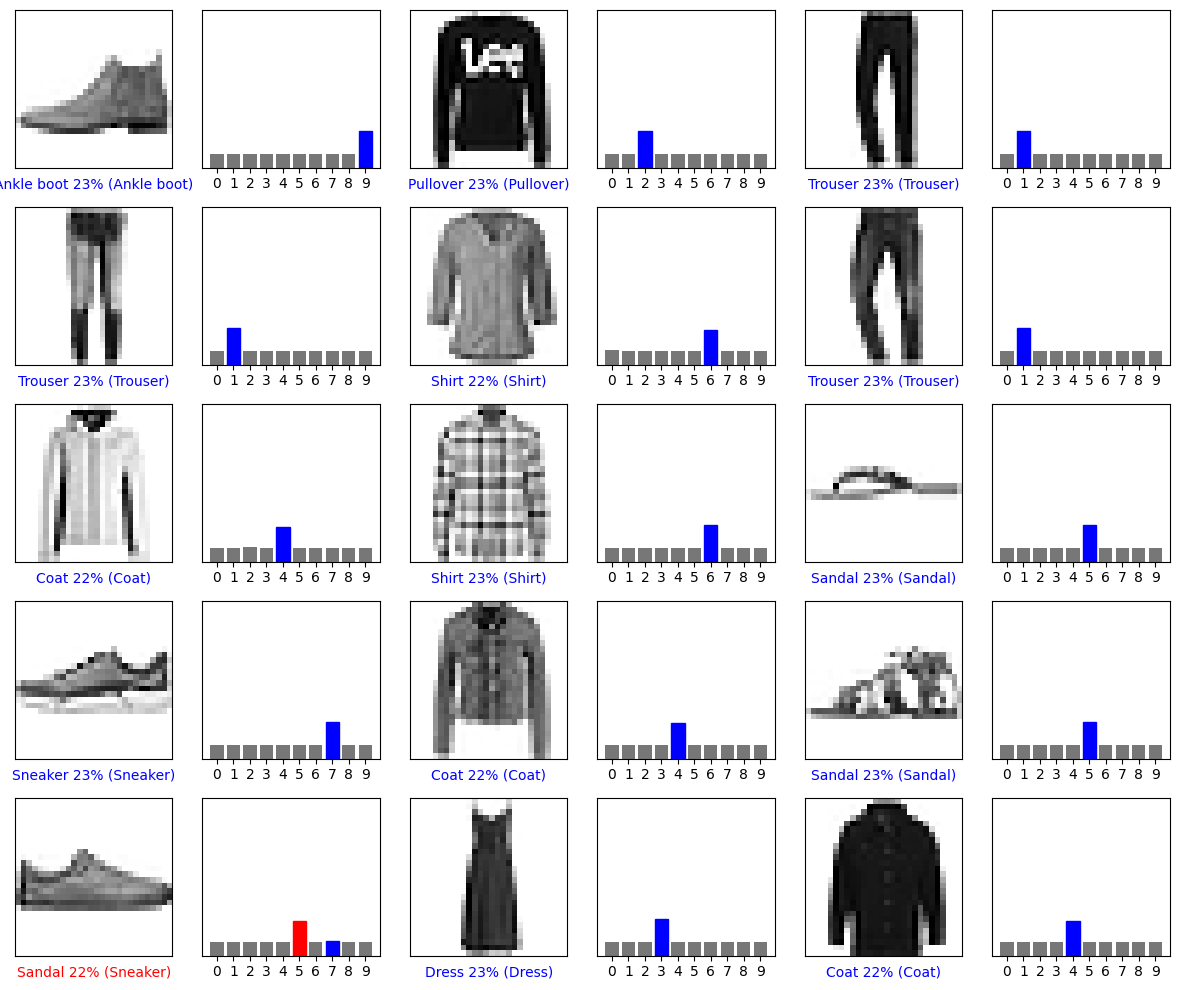

In [36]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [41]:


y_pred = np.argmax(model.predict(test_images), axis=-1)



313/313 [==============================] - 3s 8ms/step


In [42]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(test_labels, y_pred, target_names = target_names))


              precision    recall  f1-score   support

     Class 0       0.89      0.84      0.87      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.91      0.79      0.85      1000
     Class 3       0.88      0.95      0.91      1000
     Class 4       0.84      0.86      0.85      1000
     Class 5       0.99      0.99      0.99      1000
     Class 6       0.73      0.79      0.76      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

